하이퍼 매개변수 최적화에 걸린 시간은 165.92696022987366 초입니다


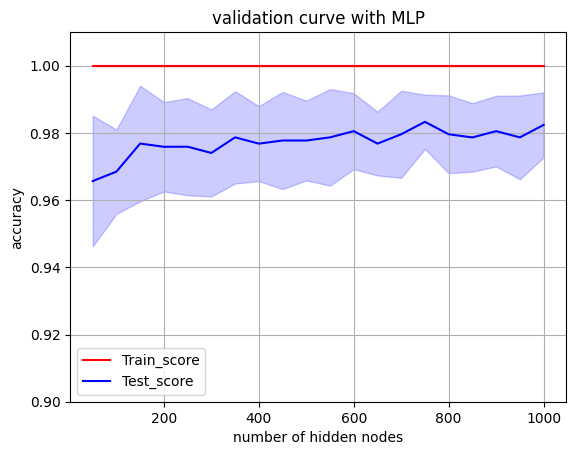


최적의 은닉층의 노드 개수는 750 개입니다

Accuracy: 0.9680111265646731


In [11]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
import matplotlib.pylab as plt
import time
from sklearn.metrics import accuracy_score, confusion_matrix
digit = datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)
start=time.time()
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange
                                        ,cv=10,scoring="accuracy",n_jobs=4)
end=time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다")
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(prange,train_mean,label="Train_score",color='r')
plt.plot(prange,test_mean,label="Test_score",color='b')
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color='r')
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color='b')
plt.legend(loc='best')
plt.title("validation curve with MLP")
plt.xlabel("number of hidden nodes"); plt.ylabel("accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)]
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다\n")

mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,
                       batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

y_pred = mlp_test.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

# 데이터를 학습용과 테스트용으로 나누기
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_test = MLPClassifier(hidden_layer_sizes=(40), learning_rate_init=0.001,
                         batch_size=32, max_iter=300, solver='adam', verbose=True)

# 학습 데이터를 사용하여 모델 훈련
mlp_test.fit(x_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = mlp_test.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


c:\Users\11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 